In [19]:
import os
from dotenv import load_dotenv
from IPython.display import Image, display

# Agent
from langchain_openai import ChatOpenAI # OpenAI's chat model for LLM interactions
from langgraph.prebuilt import create_react_agent # Prebuilt agent for React-like interaction
from langchain_community.tools import DuckDuckGoSearchRun # Prebuilt tool for web search

# from langgraph.errors import GraphRecursionError # Recursion error handling for graph execution
# https://langchain-ai.github.io/langgraph/agents/run_agents/#streaming-output


# # Graph and Overall Structure/Workflow
# from typing import TypedDict
# from langgraph.graph import StateGraph, END 



# Get API key from environment variable
load_dotenv()
OPENAI_API_KEY = os.getenv('OPENAI_API_KEY') # Setup a `.env` file with the key - https://platform.openai.com/api-keys

if not OPENAI_API_KEY:
    raise ValueError("Please set the OPENAI_API_KEY environment variable in a .env file")

# Initialize the LLM
model = ChatOpenAI(
    model= "gpt-4o-mini", #"gpt-3.5-turbo", #"o4-mini", https://platform.openai.com/docs/models
    # Use "o4-mini" after implementing exceptions handling, recursion & rate limiting
    temperature=1,
    api_key=OPENAI_API_KEY
)

## Get Rulebook (the RAG part)
Not Implemented
https://en.onepiece-cardgame.com/pdf/rule_comprehensive.pdf?20250221

## Creating the Agent

### Defining Tools

The `name` and `description` variables allow the Agent context and use for a given tool. These are also relevant when defining agents since you can have agents call subagents as tools (a pyrimad hierarchy of agents).

In [12]:
# Define the tools that the agent can use
search_tool = DuckDuckGoSearchRun(
    name="DuckDuckGoSearch",
    description="A tool to search the web using DuckDuckGo for finding rulings about One Piece TCG."
)

tools = [search_tool]

# Sample search
search_tool.invoke("One Piece TCG rulings")

"5 2-5-3. Some cards have multiple attributes, such as Slash and Strike, or Ranged and Special. 2-5-4. If a card has multiple attributes, such as Slash and Strike, it is treated as a card New ONE PIECE CARD GAME setting sail for a simultaneous worldwide release! Various characters will be available as cards each 「Straw Hat Crew」「Worst Generation」「Warlord of the Sea」「Animal Kingdom Pirates」. Explore and discover ONE PIECE with your own tactics and builds. A community for players and collectors of the One Piece Card Game. Join us to discuss news, deckbuilding, strategies, card art, tournaments, or anything else involving the One Piece Card Game. ... Pickles (Foxy Pirates) Ruling Question 📘 Rules Question If someone uses something like 4c lucci or 8c Sabo to target both pickles and another foxy ... Getting Started: How to Play the One Piece TCG. Starter Decks: Which One is Right for You? There are multiple starter decks, each themed around iconic crews like: Straw Hat Crew (ST-01) Worst G

**Thoughts for improvement**
- Alternate search engine in the case of rate limiting or errors.
    - https://python.langchain.com/docs/integrations/tools/
    - https://www.kaggle.com/code/ksmooi/langchain-duckduckgo-quick-guide-web-search#Best-Practices




### Defining the Agent ~~and Graph~~

This is a very simplistic **prebuilt** model.
- Should dive into specifics, i.e. creating an agent and a graph structure from scratch
    - https://langchain-ai.github.io/langgraph/
    - https://academy.langchain.com/courses/intro-to-langgraph

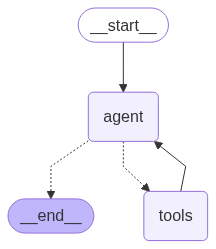

In [13]:
# Create the agent with the model and tools
agent = create_react_agent(
    model=model,
    name="OnePieceTCGAgent", # Likely change as more agents are implemented
    tools=tools,
    prompt="You are a helpful assistant that can search the web for rulings about One Piece TCG. Use the DuckDuckGoSearch tool to find information.",
)

display(Image(agent.get_graph().draw_mermaid_png()))  # Display the agent's graph structure in Mermaid format

In [14]:
response = agent.invoke({"messages": [{"role": "user", "content": "What is the ruling for the card 'Nico Robin' in One Piece TCG?"}]})
print(response["messages"][-1].content)

Here are the official rulings for Nico Robin (OP09-062), the Purple/Yellow Leader whose text reads, in short:

• Start – Reveal the top card of your deck and add it to your hand. Then put a card from your hand into your stock.  
• When this Leader deals damage to your opponent’s Leader, you may banish the top card of your opponent’s deck.

1) “Start” can be performed only once per turn (on your turn‐start step). It’s optional – you may choose to skip it – but if you do start it, you must fully resolve both parts. In particular, if you reveal a card but cannot (or choose not to) pay the cost of putting one from your hand into stock, you cannot partially resolve it.

2) The damage trigger is a “when … you may” ability, so:  
   – It only goes on the stack if battle damage actually makes it through (i.e. it isn’t reduced to zero or prevented by a Defend card or another effect).  
   – If you choose “yes,” you banish exactly the top card of your opponent’s deck. You cannot look at it ahead

In [15]:
response["messages"]

[HumanMessage(content="What is the ruling for the card 'Nico Robin' in One Piece TCG?", additional_kwargs={}, response_metadata={}, id='b1301571-080b-46da-ae69-46ae2e29710a'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_bGhnzBV63TYSNn6pKxAtKc3m', 'function': {'arguments': '{"query": "One Piece TCG Nico Robin ruling"}', 'name': 'DuckDuckGoSearch'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 161, 'prompt_tokens': 117, 'total_tokens': 278, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 128, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'o4-mini-2025-04-16', 'system_fingerprint': None, 'id': 'chatcmpl-BjH9p3A9YEXRlKMG06Bi0KpVKKiVk', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, name='OnePieceTCGAgent', id='run--bdb7d038-6dee-41b4-b648-3a1f78dccd9b-0', tool_cal

o4-mini (slower) >> gpt-4o-mini for ruling (shotgun approach)
- Should implement an alt search or config to handle exceptions

In [17]:
response = agent.invoke({"messages": [{"role": "user", "content": "What is the weather in San Francisco today?"}]})
print(response["messages"][-1].content)

I’m sorry, but I don’t have access to live weather data. For current conditions in San Francisco, you might check a weather website or app such as Weather.com, AccuWeather, or your preferred local news source.


In [18]:
response

{'messages': [HumanMessage(content='What is the weather in San Francisco today?', additional_kwargs={}, response_metadata={}, id='17608cd3-a424-4809-b7a1-cdd2c2a4e07c'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_fDBkWEn0TnH8sKauBfqi3uwl', 'function': {'arguments': '{"query": "San Francisco weather today"}', 'name': 'DuckDuckGoSearch'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 606, 'prompt_tokens': 108, 'total_tokens': 714, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 576, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'o4-mini-2025-04-16', 'system_fingerprint': None, 'id': 'chatcmpl-BjHEb6aJnf9ls3heVsoixVGZEAAqK', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, name='OnePieceTCGAgent', id='run--1519e560-35f9-4d77-96a0-71d4c371b708-0', tool_calls=[{'nam